# Análise dos Dados do Airbnb - Rio de Janeiro

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

o dataset usado neste trabalho foi baixado no dia 11/12/2022, e está disponivel em <https://raw.githubusercontent.com/Markosalves12/portifolio/main/analisandos%20dados%20do%20airbnb/listings%20(1).csv>


**Neste *notebook*, iremos analisar os dados referentes à cidade Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

C:\Users\Markos Alves\anaconda3copy\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# importar o arquivo listings.csv para um DataFrame
arquivo = "https://raw.githubusercontent.com/Markosalves12/portifolio/main/analisandos%20dados%20do%20airbnb/listings%20(1).csv"
df = pd.read_csv(arquivo)

In [4]:
display(df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,53344884,Suntuoso apartamento em Copacabana posto 6,431412286,Carlos Henrique,NaN,Copacabana,-22.98299,-43.18904,Entire home/apt,3500,3,0,NaN,NaN,10,365,0,NaN
1,44708736,Aluguel de Lancha no Rio de Janeiro,97164727,Jorge Quito,NaN,Glória,-22.91988,-43.17034,Entire home/apt,8999,1,2,2021-08-02,0.10,2,179,0,NaN
2,7801456,Ipanema Vieira Souto - Linda Vista,40650139,Carlos Alberto,NaN,Ipanema,-22.98723,-43.20452,Entire home/apt,5000,2,0,NaN,NaN,5,365,0,NaN
3,48227858,Ótimo apart-hotel com toda comodidade! ITAGUAÍ!!,387525952,Nelio,NaN,Santa Cruz,-22.87218,-43.76740,Entire home/apt,200,2,4,2021-12-17,0.22,2,356,1,NaN
4,36306164,Porto Real Resort cobertura espetacular,273041807,Andreia,NaN,Santa Cruz,-22.87738,-43.73780,Entire home/apt,636,2,12,2022-03-21,0.55,1,353,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26361,3038757,Aluguel temporada Apart Copacabana,15473637,Majobel,NaN,Copacabana,-22.98004,-43.17879,Entire home/apt,230,3,4,2020-01-02,0.04,1,192,0,NaN
26362,48602856,Apart Hotel Flat La Reserve Barra da Tijuca,40619768,Alex,NaN,Barra da Tijuca,-23.01213,-43.35503,Entire home/apt,319,3,31,2022-09-11,1.83,1,83,25,NaN
26363,34153753,NOSSO LAR II,257864405,Ana Cláudia,NaN,Santa Cruz,-22.87480,-43.73820,Entire home/apt,900,2,0,NaN,NaN,1,365,0,NaN
26364,47739419,LUX RIO 06 - Flat Frente praia com piscina,13949537,Alexander,NaN,Ipanema,-22.98796,-43.18848,Entire home/apt,650,3,26,2022-08-20,1.27,11,76,18,NaN


## Análise dos Dados


In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

**Dicionário das variáveis**

* id = id do imóvel
*  name = descrição do imóvel
* host_id = nome do anfitrião
* host_name = nome do anfitrião
* neighbourhood = bairro
* latitude = latitude
* longitude = longitude
* room_type = tipo de quarto alugado
* price = valor da diária no local
* minimum_nights = numero minimo de noites para alugar
* number_of_reviews = número de avaliações
* last_review = ultima avaliação
* reviews_per_month = reviews por mês
* calculated_host_listings_count = numero de listagems que o anfitrião tem na região
* availability_365 = avaliaçãos nos últimos 365 dias
* number_of_reviews_ltm = numeros de avaliações nos últimos 12 meses
* license = registro de licença no airbnb
* availability = disponibilidade do imovel
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,53344884,Suntuoso apartamento em Copacabana posto 6,431412286,Carlos Henrique,NaN,Copacabana,-22.98299,-43.18904,Entire home/apt,3500,3,0,NaN,NaN,10,365,0,NaN
1,44708736,Aluguel de Lancha no Rio de Janeiro,97164727,Jorge Quito,NaN,Glória,-22.91988,-43.17034,Entire home/apt,8999,1,2,2021-08-02,0.10,2,179,0,NaN
2,7801456,Ipanema Vieira Souto - Linda Vista,40650139,Carlos Alberto,NaN,Ipanema,-22.98723,-43.20452,Entire home/apt,5000,2,0,NaN,NaN,5,365,0,NaN
3,48227858,Ótimo apart-hotel com toda comodidade! ITAGUAÍ!!,387525952,Nelio,NaN,Santa Cruz,-22.87218,-43.76740,Entire home/apt,200,2,4,2021-12-17,0.22,2,356,1,NaN
4,36306164,Porto Real Resort cobertura espetacular,273041807,Andreia,NaN,Santa Cruz,-22.87738,-43.73780,Entire home/apt,636,2,12,2022-03-21,0.55,1,353,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [11]:
# identificar o volume de dados do DataFrame
formato = df.shape
print(f'variaveis:{formato[1]}')
print(f'entradas:{formato[0]}')
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

variaveis:18
entradas:26366


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [12]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.266366
last_review                       0.266366
name                              0.000721
host_name                         0.000190
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

análises:
* 100% das colunas: license, neighbourhood_group, estão com valores ausentes                             

### **Q3. Qual o tipo de distribuição das variáveis?** 

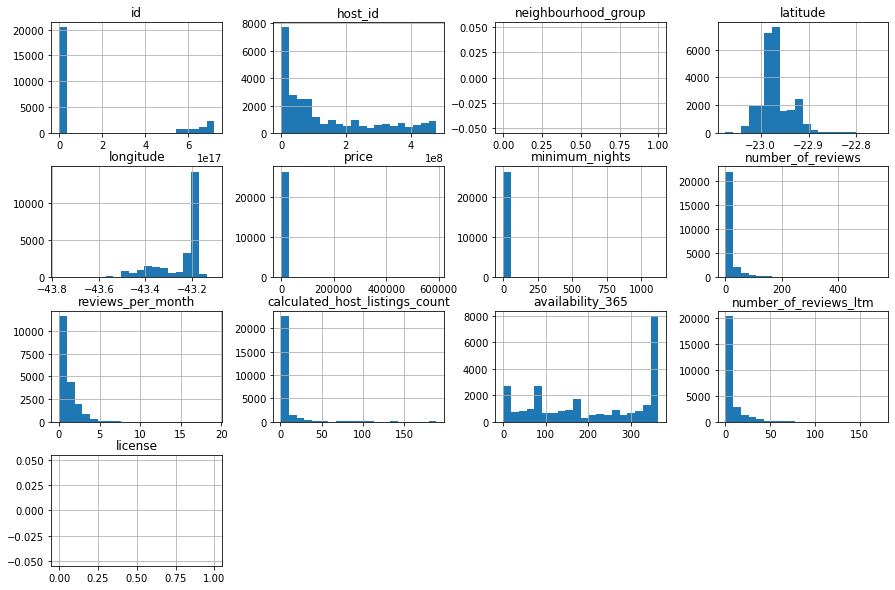

In [16]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15, 10));

### **Q4. Qual a média dos preços de aluguel?**

Pelas distribuições de histogramas acima é possivel ver que ha indi+ícios de Outliers, olhe por exemplo as price, minimun_nights e calculated_host_listings_count.
* os valores não seguem uma distribuição e acabam distorcendo a representação

In [18]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
    'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,26366.000000,26366.000000,26366.000000,19343.000000,26366.000000,26366.000000,26366.000000
mean,782.525791,5.068156,17.387507,0.964334,8.302966,211.595426,6.000076
std,5265.469954,25.795705,37.456744,1.074740,23.093704,133.446650,10.429095
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,183.000000,1.000000,0.000000,0.170000,1.000000,88.000000,0.000000
50%,303.000000,2.000000,3.000000,0.620000,1.000000,216.000000,1.000000
75%,600.000000,4.000000,16.000000,1.350000,4.000000,357.000000,7.000000
max,590887.000000,1125.000000,549.000000,19.150000,189.000000,365.000000,173.000000


Olhando quadro resumo, podemos confirmar algumas hipoteses como:
* a variavel price possui 75% dos valores abaixo de 600, porém a valor máximo de 590887
* a quantidade minima de noite (minimum_nights) é em média de 6 noites, porém o valor máximo no dataset é de 1125 noites

#### **Boxpot para minimum_nights**

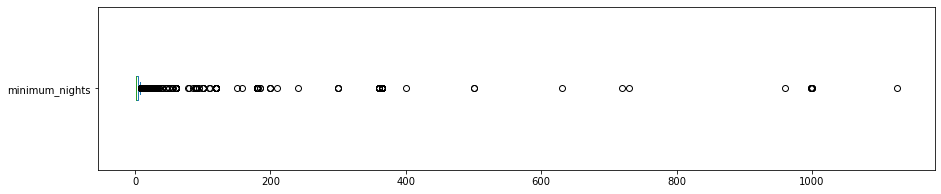

minimum_nights: Média: 5.068156
minimum_nights: valores acima de 30 dias: 241
minimum_nights: %valores acima de 30 dias 0.9140559811878936%


In [29]:
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print(f'minimum_nights: Média: 5.068156')
print(f"minimum_nights: valores acima de 30 dias: {len(df[df['minimum_nights'] > 30])}")
print(f"minimum_nights: %valores acima de 30 dias {(len(df[df['minimum_nights'] > 30]) /  df.shape[0]) * 100}%")

Observe que menos de 1% dos dados para 'minimum_nights' são maiores que 30 dias, ou seja esses dados estão destruindo as informações estatisticas

#### **Boxpot para price**

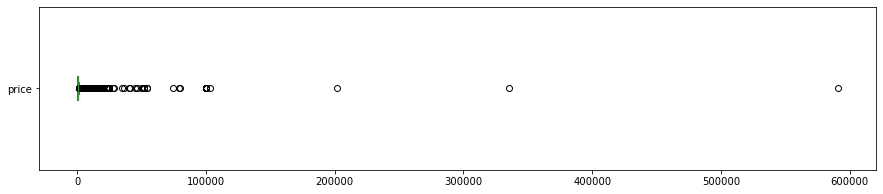

price: Média: 782.5257907911705
minimum_nights: valores acima de R$1500,00: 2022
minimum_nights: %valores acima de R$1500,00 7.6689676098005%


In [34]:
df['price'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print(f'price: Média: {df["price"].mean()}')
print(f"minimum_nights: valores acima de R$1500,00: {len(df[df['price'] > 1500])}")
print(f"minimum_nights: %valores acima de R$1500,00 {(len(df[df['price'] > 1500]) /  df.shape[0]) * 100}%")

Observe que menos de 8% dos dados para 'price' são maiores que R$1500.00, chegando a perto dos 600 mil reais, ou seja esses dados estão destruindo as informações estatisticas, e podem ser removidos da analise

#### histogramas sem outliers

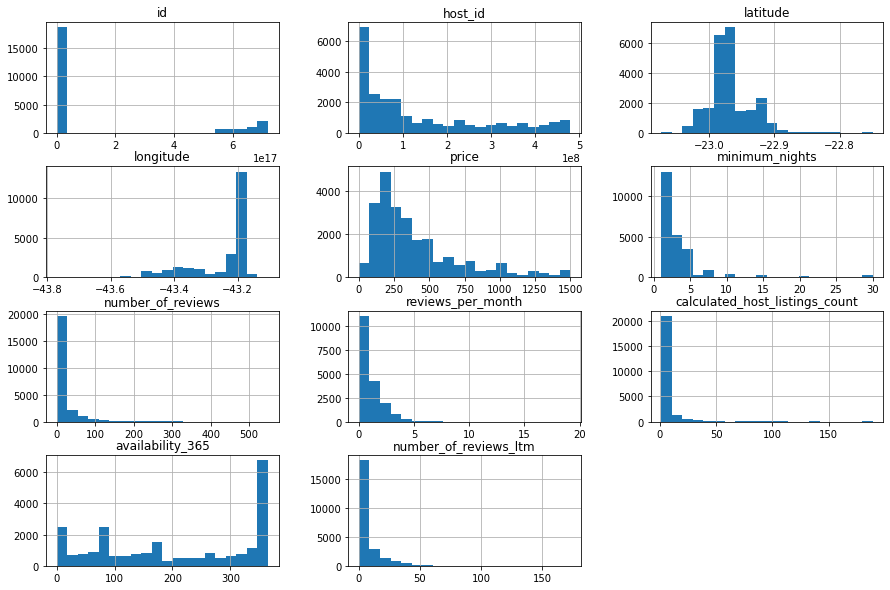

In [36]:
#removendo os outliers das colunas 'minimum_nights' e 'price'
df_limpo = df.copy()
df_limpo.drop(df_limpo[df_limpo['minimum_nights'] > 30].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo['price'] > 1500].index, axis=0, inplace=True)

#removendo a colunas 'neighbourhood_group' e 'license'
df_limpo.drop(['neighbourhood_group','license'], axis=1, inplace=True)

#plotar os histograms
df_limpo.hist(bins=20, figsize=(15, 10));

### **Q4. Qual a correlação existente entre as variáveis**

In [37]:
df_limpo.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [40]:
# criar uma matriz de correlação
corr = df_limpo[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
                 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.105159,-0.164600,-0.150887,0.089999,0.131483
minimum_nights,0.105159,1.000000,-0.068862,-0.174652,-0.019867,-0.015581
number_of_reviews,-0.164600,-0.068862,1.000000,0.406566,-0.047691,-0.137479
reviews_per_month,-0.150887,-0.174652,0.406566,1.000000,-0.016148,-0.041769
calculated_host_listings_count,0.089999,-0.019867,-0.047691,-0.016148,1.000000,-0.010726
availability_365,0.131483,-0.015581,-0.137479,-0.041769,-0.010726,1.000000


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variavel 'roo_type', indica o tipo de locação que está anunciada no airbnb, se é de um imovel inteiro, ou apenas um querto, ou querto compartilhado.

In [43]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_limpo['room_type'].value_counts() / df_limpo.shape[0]

Entire home/apt    0.753501
Private room       0.224377
Shared room        0.019886
Hotel room         0.002237
Name: room_type, dtype: float64

Na base de dados analisada, cerca de 75% das locações são de casas completas, representando a maioria, enquanto os quartos de hoteis representam a minoria, com menos de 1% dos anúncios

### **Q6. Qual a localidade mais cara do dataset?**



In [56]:
# ver preços por bairros, na média
df_limpo.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[0:10]

neighbourhood
Caju                      1033.000000
Ricardo de Albuquerque     943.666667
Complexo do Alemão         900.000000
Anchieta                   800.000000
Grumari                    673.800000
Joá                        565.777778
São Conrado                563.075758
Santíssimo                 563.000000
Lagoa                      558.354286
Gericinó                   546.000000
Name: price, dtype: float64

análise, pergunta:
sabemos que o complexo do alemão é uma comunidade do rio, por que os alugueis naquela região é mais caro?

In [64]:
#ver a quantidade de imóveis no complexo do alemão
display(df_limpo[df_limpo["neighbourhood"] == "Complexo do Alemão"])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
8805,21448656,Casa 1 quarto alem,155642978,Felipe,Complexo do Alemão,-22.85998,-43.27476,Shared room,900,1,1,2017-11-28,0.02,1,365,0


existe um único dado sobre os imóveis disponiveis para aluguel no complexo do alemão
o volume de dados no bairro do complexo do alemão não é significativo o suficiente para representar os imóveis para alugar naquela região

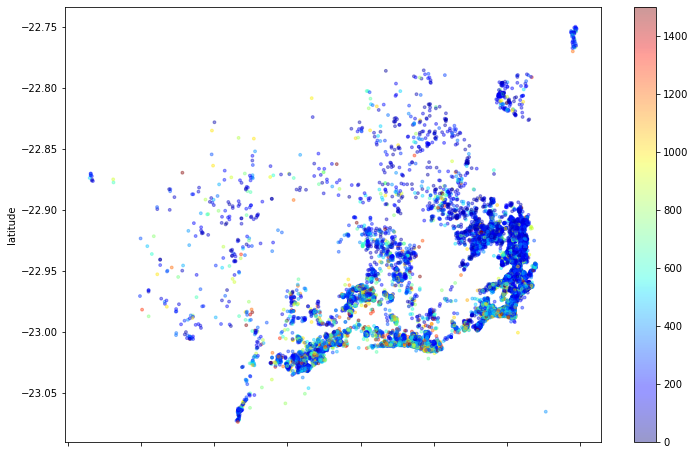

In [67]:
# plotar os imóveis pela latitude-longitude
df_limpo.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'], s=8,
             cmap=plt.get_cmap('jet'), figsize=(12, 8))
plt.show()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [71]:
# ver a média da coluna `minimum_nights``
print(f"o minimo de noites para locação é de {df_limpo['minimum_nights'].mean()}")

o minimo de noites para locação é de 3.3714889386030324
